Text(0.5, 1.0, 'Distribution of Slab Lengths (ft)')

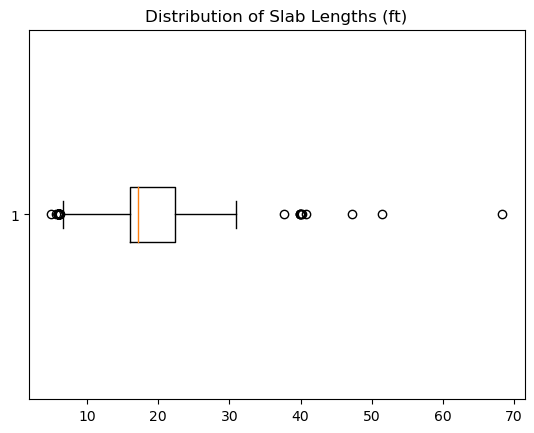

In [19]:
'''
Notebook analyzing how the data should be filtered. Also contains code for tagging slabs that could have been replaced recently.

'''

# Standard suite of data analysis tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
# Machine learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('..\spreadsheet_data\i16WB_filtered.csv')

plt.boxplot(df['BY Length (ft)'], vert=False)
plt.title('Distribution of Slab Lengths (ft)')


In [20]:
histogram = px.histogram(df, x='BY Length (ft)', nbins=300, title='Distribution of Slab Lengths (ft)')
histogram.update_traces(xbins=dict(
    start=0,
    end=60,
    size=0.1
))

In [21]:
Q1 = df['BY Length (ft)'].quantile(0.25)
Q3 = df['BY Length (ft)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['BY Length (ft)'] < Q3 + 1.5*IQR) & (df['BY Length (ft)'] > Q1 - 1.5*IQR)]

Text(0.5, 0, 'Slab Length (ft)')

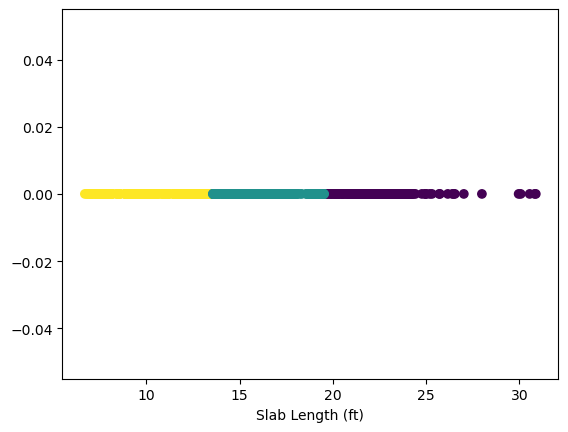

In [16]:
# # Let's see if K-means gets us anywhere (it doesn't)
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df[['BY Length (ft)']])
# df['group'] = kmeans.labels_
# df.head()

# data = df['BY Length (ft)']
# plt.scatter(data, np.zeros_like(data), c=df['group'])
# plt.xlabel('Slab Length (ft)')

In [23]:
possible_range = [(15, 18), (21, 24)]


df['possibly_replaced_or_bridge'] = np.where(
    (df['BY Length (ft)'] > possible_range[0][0]) & 
    (df['BY Length (ft)'] < possible_range[0][1]) | 
    (df['BY Length (ft)'] > possible_range[1][0]) & 
    (df['BY Length (ft)'] < possible_range[1][1]), 0, 1)


df.to_excel('../spreadsheet_data/i16WB_tag_replaced.xlsx', index=False)

In [25]:
df_filtered = df = pd.read_csv('../spreadsheet_data/i16WB_filtered_encoded.csv')
histogram = px.histogram(df, x='BY Length (ft)', nbins=300, title='Distribution of Slab Lengths (ft)')
histogram.update_traces(xbins=dict(
    start=0,
    end=60,
    size=0.1
))